# Interpolating the unknown pixels with varying number of randomly sampled values

In [1]:
import os
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import cv2
import skimage


In [2]:
# inteerpolating the randomly sampled image

def make_interpolated_image(ix,iy,nsamples):
    """Make an interpolated image from a random selection of pixels.

    Take nsamples random pixels from im and reconstruct the image using
    scipy.interpolate.griddata.

    """
    samples = im[iy,ix]
    int_im = griddata((iy, ix), samples, (Y, X))
    return(int_im)


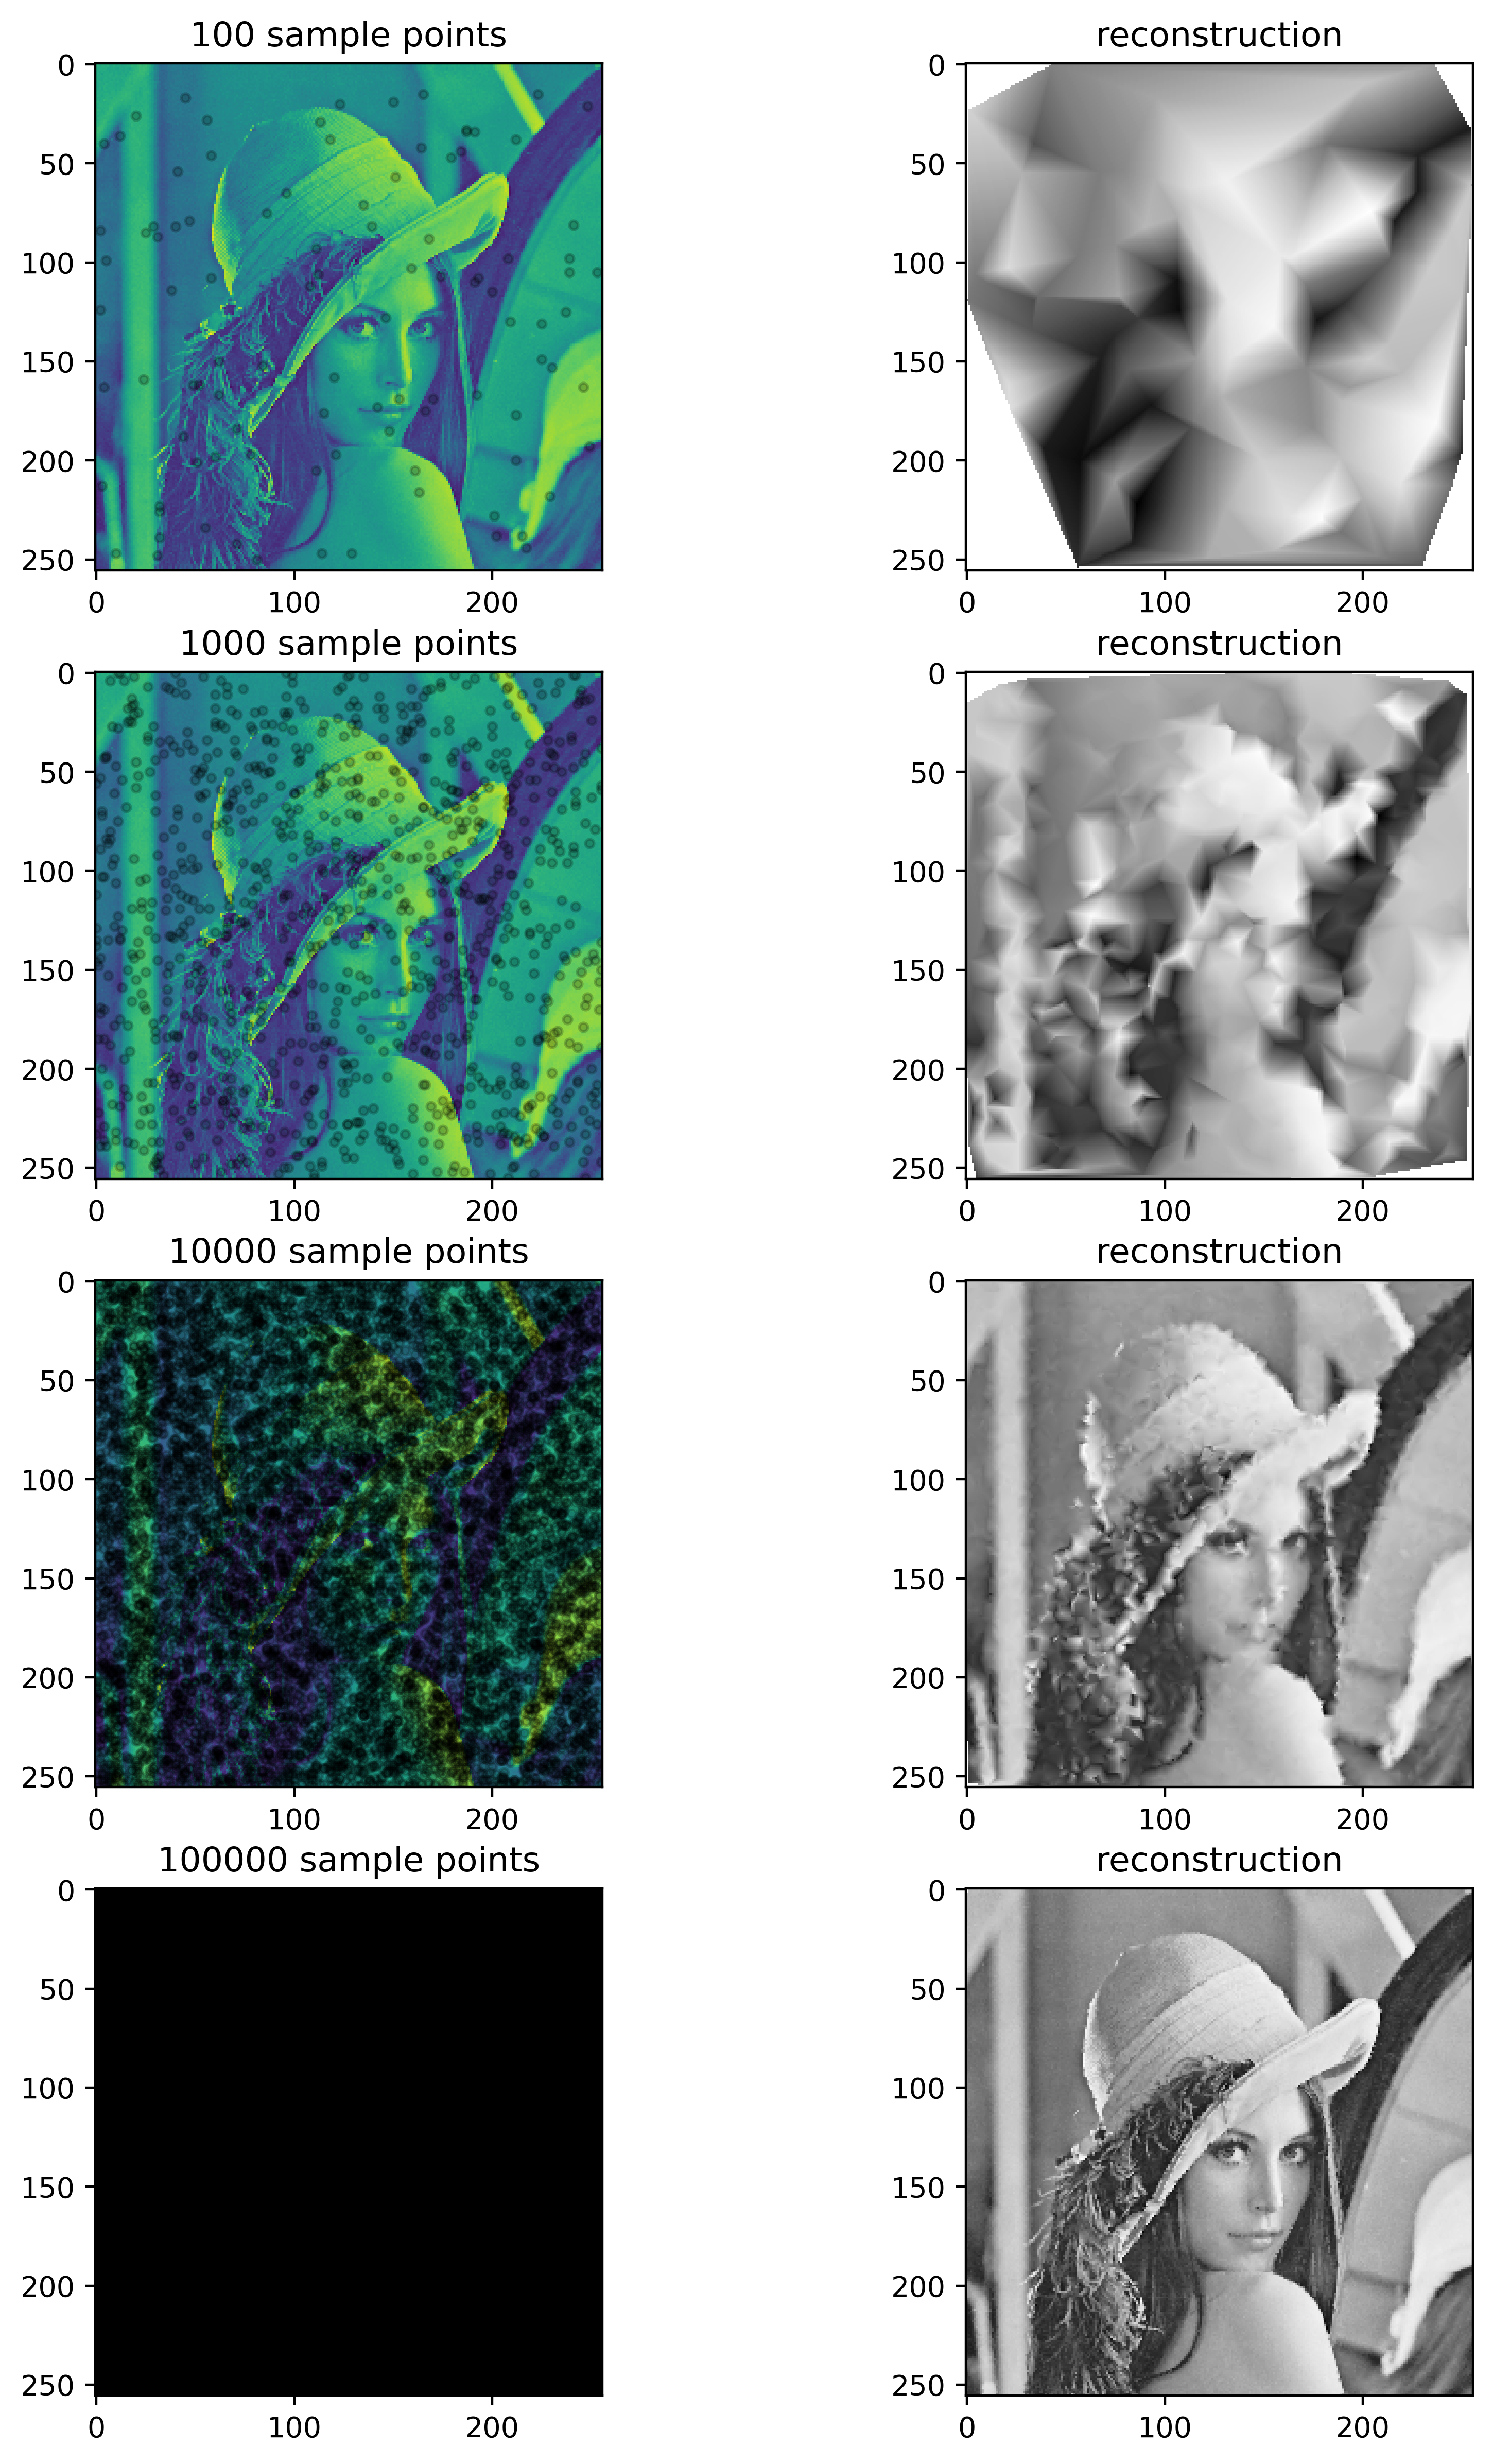

In [3]:
im = cv2.imread(r"C:\Users\nandita\Desktop\lena.png",0)

# A meshgrid of pixel coordinates
nx, ny = im.shape[1], im.shape[0]
X, Y = np.meshgrid(np.arange(0, nx, 1), np.arange(0, ny, 1))

# Create a figure of nrows x ncols subplots, and orient it appropriately
# for the aspect ratio of the image.
nrows, ncols = 4, 2
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(10,15), dpi=400)


# Sample 100, 1,000, 10,000 and 100,000 points and plot the interpolated images in the figure
l=[]
for i, axi in enumerate(ax.flat):
    nsamples = 10**((i//2)+2)
    ix = np.random.randint(im.shape[1], size=nsamples)
    iy = np.random.randint(im.shape[0], size=nsamples)
    if i%2==0:
        
    #Choose random points from the discrete domain 
    
        axi.imshow(im)
        axi.scatter(ix, iy, c='k', alpha=0.2, marker='.')
        rowid = i//2
        colid = i%2
        axi.set_title(str(nsamples)+' sample points')
    
    else:
        reconstructed =make_interpolated_image(ix,iy,nsamples)
        axi.imshow(reconstructed,cmap=plt.get_cmap('Greys_r'))
        rowid = i//2
        colid = i%2
        axi.set_title('reconstruction')
        l.append(reconstructed)
plt.show()
fig.savefig('sample_points.jpg')


In [74]:
for i in range(4):
    output = np.nan_to_num(l[i])
    psnr = skimage.metrics.peak_signal_noise_ratio(im,output)
    ssim = skimage.measure.compare_ssim(im,output)
    print("For "+ str(10**(i+2))+" sample points: "+"PSNR= ",psnr, end=" ")
    print("SSIM= ", ssim)

For 100 sample points: PSNR=  12.054090898727555 SSIM=  0.2865428677121672
For 1000 sample points: PSNR=  18.412490414777217 SSIM=  0.5017896709007572
For 10000 sample points: PSNR=  23.69044197182099 SSIM=  0.7594461463680326
For 100000 sample points: PSNR=  32.07196417770662 SSIM=  0.9611705800048794


<ipython-input-74-a1de7abc9c07>:3: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  psnr = skimage.metrics.peak_signal_noise_ratio(im,output)
<ipython-input-74-a1de7abc9c07>:4: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  ssim = skimage.measure.compare_ssim(im,output)


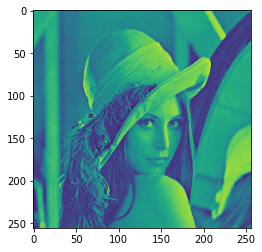

In [4]:
plt.imshow(im)